In [2]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from model import LSTMAutoencoder
from preprocessing import load_data, normalize_data, segment_windows

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def main():
    # Load and preprocess data
    df = load_data()
    
    if 'label' in df.columns:
        df = df[df['label'] == 0]
        df = df.drop(columns=['label'])
    data_norm = normalize_data(df)
    
    # Use same window size as preprocessing
    windows = segment_windows(data_norm, window_size=50, step_size=25)
    
    # Check for empty windows
    if windows.shape[0] == 0:
        print("Not enough data for the chosen window size. Please decrease window_size or add more data.")
        return

    X = torch.tensor(windows, dtype=torch.float32)

    seq_len = X.shape[1]
    n_features = X.shape[2]
    embedding_dim = 64

    model = LSTMAutoencoder(seq_len, n_features, embedding_dim).to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.MSELoss()

    n_epochs = 30
    batch_size = 32
    train_loader = DataLoader(TensorDataset(X), batch_size=batch_size, shuffle=True)

    model.train()
    for epoch in range(n_epochs):
        epoch_loss = 0
        for batch in train_loader:
            batch_x = batch[0].to(DEVICE)
            output = model(batch_x)
            loss = criterion(output, batch_x)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

    torch.save(model.state_dict(), r"C:\MLCourse\My_Exercises\Autonomous System\Data\lstm_autoencoder.pth")
    print("Model saved to C:/MLCourse/My_Exercises/Autonomous System/Data/lstm_autoencoder.pth")

if __name__ == "__main__":
    main()    

Epoch 1/30, Loss: 0.2455
Epoch 2/30, Loss: 0.1633
Epoch 3/30, Loss: 0.1046
Epoch 4/30, Loss: 0.0761
Epoch 5/30, Loss: 0.0684
Epoch 6/30, Loss: 0.0511
Epoch 7/30, Loss: 0.0396
Epoch 8/30, Loss: 0.0275
Epoch 9/30, Loss: 0.0213
Epoch 10/30, Loss: 0.0201
Epoch 11/30, Loss: 0.0151
Epoch 12/30, Loss: 0.0139
Epoch 13/30, Loss: 0.0117
Epoch 14/30, Loss: 0.0121
Epoch 15/30, Loss: 0.0110
Epoch 16/30, Loss: 0.0113
Epoch 17/30, Loss: 0.0107
Epoch 18/30, Loss: 0.0082
Epoch 19/30, Loss: 0.0072
Epoch 20/30, Loss: 0.0069
Epoch 21/30, Loss: 0.0067
Epoch 22/30, Loss: 0.0060
Epoch 23/30, Loss: 0.0056
Epoch 24/30, Loss: 0.0052
Epoch 25/30, Loss: 0.0050
Epoch 26/30, Loss: 0.0056
Epoch 27/30, Loss: 0.0047
Epoch 28/30, Loss: 0.0047
Epoch 29/30, Loss: 0.0043
Epoch 30/30, Loss: 0.0062
Model saved to C:/MLCourse/My_Exercises/Autonomous System/Data/lstm_autoencoder.pth


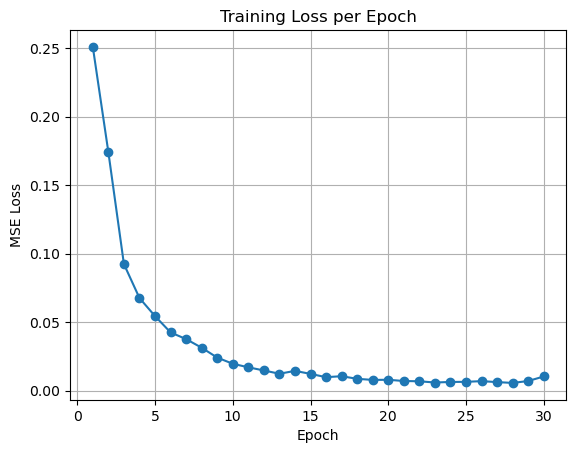

In [4]:
import matplotlib.pyplot as plt

losses = [0.2510, 0.1741, 0.0924, 0.0676, 0.0544, 0.0425, 0.0376, 0.0313, 0.0241,
          0.0196, 0.0170, 0.0147, 0.0123, 0.0144, 0.0122, 0.0098, 0.0105, 0.0086,
          0.0078, 0.0079, 0.0070, 0.0068, 0.0059, 0.0063, 0.0064, 0.0069, 0.0062,
          0.0056, 0.0070, 0.0103]

plt.plot(range(1, 31), losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()